<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/TEMA_8_Identificaci%C3%B3n_de_Personajes_y_Relaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROCESAMIENTO DEL HABLA**
# DESAFÍO OBLIGATORIO FINAL MARTÍN FIERRO
**DOCENTE:** Ingeniera en Sistemas de Información Ana Laura Diedrichs

**ALUMNO:** Vargas Luciano Benjamín



# PRESENTACION DEL DATA SET
Para este proyecto vamos a utilizar el libro gauchesco "EL Martín Fierro".


### Descargamos los archivos desde la url

In [ ]:
!python -m pip install PyPDF2

In [ ]:
import requests
from PyPDF2 import PdfReader

# Descargar el poema
url = "https://www.argentina.gob.ar/sites/default/files/hernandez_jose_-_el_gaucho_martin_fierro.pdf"
response = requests.get(url)

# Guardar el PDF en Colab
with open("martin_fierro.pdf", "wb") as f:
    f.write(response.content)

# Extraer el texto del PDF
reader = PdfReader("martin_fierro.pdf")
texto = " ".join([page.extract_text() for page in reader.pages])


# PREPROCESAMIENTO DEL TEXTO

### Función para limpiar texto y separar en estrofas.

In [ ]:
# Función para limpiar el texto y dividirlo en estrofas

import re
[ ]


def limpiar_y_dividir_en_estrofas(texto):
    # Eliminar texto irrelevante antes del poema
    inicio_poema = "Aquí me pongo a cantar"
    if inicio_poema in texto:
        texto = texto.split(inicio_poema, 1)[1]
        texto = inicio_poema + texto  # Asegurar que comienza correctamente

    # Eliminar referencias no deseadas
    texto = re.sub(r'Recursos de dominio público.*?Página \d+', '', texto, flags=re.DOTALL)
    texto = re.sub(r'El gaucho Martín Fierro', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r'José Hernández', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r'Imágenes de dominio público.*', '', texto, flags=re.DOTALL)

    # Eliminar números romanos del I al XIII
    texto = re.sub(r'\b(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII)\b', '', texto)

    # Eliminar cualquier palabra "Página" y números de página
    texto = re.sub(r'\b(página|Página)\b.*?\d+', '', texto)

    # Normalizar saltos de línea
    texto = re.sub(r'\n+', '\n', texto).strip()

    # Dividir el texto en líneas y eliminar líneas vacías
    lineas = [linea.strip() for linea in texto.split("\n") if linea.strip()]

    # Dividir en estrofas: 6 líneas por estrofa excepto la última (8 líneas)
    estrofas = []
    estrofa = []

    for linea in lineas:
        estrofa.append(linea)

        # Si tenemos 6 líneas, guardamos la estrofa
        if len(estrofa) == 6:
            estrofas.append("\n".join(estrofa))
            estrofa = []

    # Agregar la última estrofa
    if estrofa:
        estrofas.append("\n".join(estrofa))

    return estrofas

# Aplicar la función al texto extraído
Estrofas_Martin_Fierro = limpiar_y_dividir_en_estrofas(texto)

# Imprimir algunas estrofas como muestra
for i, estrofa in enumerate(Estrofas_Martin_Fierro[:3]):
    print(f"Estrofa {i+1}:\n{estrofa}\n")

Estrofa 1:
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.

Estrofa 2:
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.

Estrofa 3:
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.



### Tokenización

Divide el texto en oraciones o palabras para facilitar el procesamiento.

In [ ]:
# Tokenización para que el modelo entienda el texto
martin_fierro_tokens = [line.split() for line in Estrofas_Martin_Fierro if line]

In [ ]:
print(martin_fierro_tokens)

[['Aquí', 'me', 'pongo', 'a', 'cantar', 'al', 'compás', 'de', 'la', 'vigüela,', 'que', 'el', 'hombre', 'que', 'lo', 'desvela', 'una', 'pena', 'estrordinaria,', 'como', 'la', 'ave', 'solitaria', 'con', 'el', 'cantar', 'se', 'consuela.'], ['Pido', 'a', 'los', 'santos', 'del', 'cielo', 'que', 'ayuden', 'mi', 'pensamiento:', 'les', 'pido', 'en', 'este', 'momento', 'que', 'voy', 'a', 'cantar', 'mi', 'historia', 'me', 'refresquen', 'la', 'memoria', 'y', 'aclaren', 'mi', 'entendimiento.'], ['Vengan', 'santos', 'milagrosos,', 'vengan', 'todos', 'en', 'mi', 'ayuda,', 'que', 'la', 'lengua', 'se', 'me', 'añuda', 'y', 'se', 'me', 'turba', 'la', 'vista;', 'pido', 'a', 'mi', 'Dios', 'que', 'me', 'asista', 'en', 'una', 'ocasión', 'tan', 'ruda.'], ['Yo', 'he', 'visto', 'muchos', 'cantores,', 'con', 'famas', 'bien', 'otenidas', 'y', 'que', 'después', 'de', 'alquiridas', 'no', 'las', 'quieren', 'sustentar:', 'parece', 'que', 'sin', 'largar', 'se', 'cansaron', 'en', 'partidas.'], ['Mas', 'ande', 'otro', 

In [ ]:
Martin_Fierro = martin_fierro_tokens

# TEMA 8 Identificación de Personajes y Relaciones
Implementar un sistema de reconocimiento de entidades (NER)  para identificar los personajes principales en el libro. Luego, analizar las relaciones entre los personajes utilizando gráficos de redes para representar cómo interactúan a lo largo del poema.


In [ ]:
!pip install spacy --quiet
!python -m spacy download es_core_news_sm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 40.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

### Identificar entidades del texto Martin Fierro

In [ ]:
# Procesar el texto
texto = Martin_Fierro

# Unir los tokens de nuevo en una sola cadena
texto_procesado = " ".join([" ".join(oracion) for oracion in texto])

# Ahora pasar el texto procesado a spaCy
doc = nlp(texto_procesado)

# Identificar y mostrar entidades
for entidad in doc.ents:
    #if entidad.label_ == "PER":  # Filtra solo entidades de tipo 'Persona'
        print(f"Entidad: {entidad.text}, Tipo: {entidad.label_}")

Entidad: Pido a los santos del cielo, Tipo: MISC
Entidad: Vengan, Tipo: PER
Entidad: Dios, Tipo: PER
Entidad: Yo he visto muchos cantores, Tipo: MISC
Entidad: Mas, Tipo: MISC
Entidad: Martín Fierro, Tipo: PER
Entidad: Cantando me he de morir, Tipo: MISC
Entidad: Eterno Padre, Tipo: MISC
Entidad: Me siento en el plan de un bajo, Tipo: MISC
Entidad: Con oros, Tipo: MISC
Entidad: Yo no soy cantor letrao, Tipo: MISC
Entidad: Con la guitarra, Tipo: MISC
Entidad: No me hago, Tipo: MISC
Entidad: En el peligro ¡qué Cristos!, Tipo: MISC
Entidad: corazón, Tipo: LOC
Entidad: Soy gaucho, Tipo: MISC
Entidad: Nací, Tipo: LOC
Entidad: Dios, Tipo: PER
Entidad: Mi gloria, Tipo: MISC
Entidad: Yo no tengo en el amor quien me venga, Tipo: MISC
Entidad: rama, Tipo: MISC
Entidad: peleo, Tipo: PER
Entidad: Ninguno me hable de penas, Tipo: MISC
Entidad: Junta, Tipo: MISC
Entidad: Viene el hombre ciego, Tipo: MISC
Entidad: jogón, Tipo: LOC
Entidad: El que era pión domador, Tipo: MISC
Entidad: Dios, Tipo: MISC


In [ ]:
# Identificar y mostrar solo entidades PER
for entidad in doc.ents:
    if entidad.label_ == "PER":  # Filtra solo entidades de tipo 'Persona'
        print(f"Entidad: {entidad.text}, Tipo: {entidad.label_}")

Entidad: Vengan, Tipo: PER
Entidad: Dios, Tipo: PER
Entidad: Martín Fierro, Tipo: PER
Entidad: Dios, Tipo: PER
Entidad: peleo, Tipo: PER
Entidad: tenía tropilla, Tipo: PER
Entidad: Aquéllo, Tipo: PER
Entidad: ansí lastimao, Tipo: PER
Entidad: Ahí, Tipo: PER
Entidad: Ansí, Tipo: PER
Entidad: Sólo, Tipo: PER
Entidad: Cantando, Tipo: PER
Entidad: Juez de Paz, Tipo: PER
Entidad: Juyeron, Tipo: PER
Entidad: Allí, Tipo: PER
Entidad: la mona, Tipo: PER
Entidad: habían agarrao también, Tipo: PER
Entidad: ansí sufrí, Tipo: PER
Entidad: proclamar, Tipo: PER
Entidad: Ansí, Tipo: PER
Entidad: según, Tipo: PER
Entidad: Recién, Tipo: PER
Entidad: jabón, Tipo: PER
Entidad: Ahí, Tipo: PER
Entidad: Daban, Tipo: PER
Entidad: habían manotiao, Tipo: PER
Entidad: habían hallao, Tipo: PER
Entidad: Allí, Tipo: PER
Entidad: Sabe, Tipo: PER
Entidad: Hacían, Tipo: PER
Entidad: habían, Tipo: PER
Entidad: Habían, Tipo: PER
Entidad: Fierro, Tipo: PER
Entidad: jabón, Tipo: PER
Entidad: había boliao, Tipo: PER
Entid

### Buscamos las entidades PER principales.

In [ ]:
# Definimos una lista de personajes principales
personajes_principales = ["soldao","Juez de Paz", "Dios","la mona",
    "malón", "Cristo", "duende", "gaucho", "San Pedro", "El moreno", "Negra", "diablo", "Don Ganza", "China",
    "El pueblo","Martín Fierro", "Cruz", "Picardía", "Vizcacha"]

# Procesamos el texto
texto_procesado = " ".join([" ".join(oracion) for oracion in Martin_Fierro])
doc = nlp(texto_procesado)

# Encuentra y muestra entidades PER principales
entidades_principales = {}  # Diccionario para almacenar las entidades principales y sus recuentos
for entidad in doc.ents:
    if entidad.label_ == "PER" and entidad.text in personajes_principales:
        entidades_principales[entidad.text] = entidades_principales.get(entidad.text, 0) + 1

# Imprime las entidades principales y sus recuentos
for entidad, recuento in entidades_principales.items():
    print(f"Personaje principal: {entidad}, Menciones: {recuento}")

Personaje principal: Dios, Menciones: 7
Personaje principal: Martín Fierro, Menciones: 1
Personaje principal: Juez de Paz, Menciones: 2
Personaje principal: la mona, Menciones: 1
Personaje principal: Cristo, Menciones: 3
Personaje principal: soldao, Menciones: 2
Personaje principal: malón, Menciones: 2
Personaje principal: Don Ganza, Menciones: 1
Personaje principal: San Pedro, Menciones: 1
Personaje principal: duende, Menciones: 1
Personaje principal: Cruz, Menciones: 1


### Graficamos la principales entidades PER

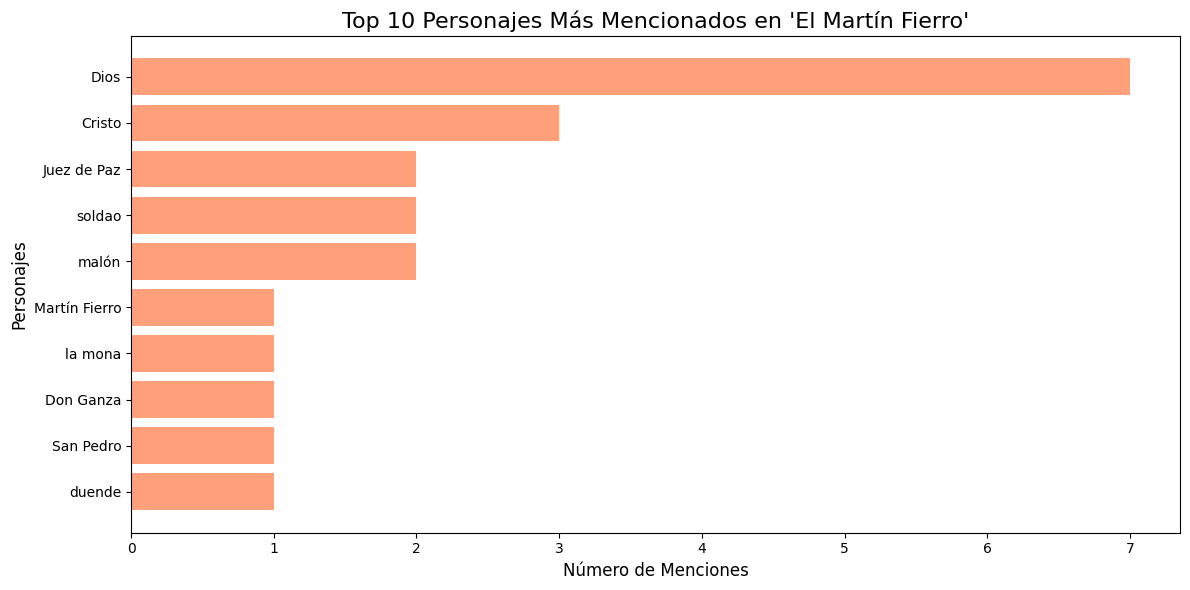

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt


conteo_personajes = Counter(entidades_principales)

# Extraemos los 10 personajes principales
top_personajes = conteo_personajes.most_common(10)
nombres, menciones = zip(*top_personajes)

# Graficamos
plt.figure(figsize=(12, 6))
plt.barh(nombres, menciones, color='#FFA07A')
plt.title("Top 10 Personajes Más Mencionados en 'El Martín Fierro'", fontsize=16)
plt.xlabel("Número de Menciones", fontsize=12)
plt.ylabel("Personajes", fontsize=12)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

### Análisis de Relaciones entre Personajes

In [ ]:
# Análizamos relaciones entre personajes
relaciones = []
for estrofa in doc.sents:  # Iteraramos sobre las oraciones en lugar de los tokens
    doc_estrofa = nlp(estrofa.text)  # Usamos estrofa.text para obtener el texto de la oración
    personajes_estrofa = [ent.text for ent in doc_estrofa.ents if ent.label_ == "PER"]
    for i, p1 in enumerate(personajes_estrofa):
        for p2 in personajes_estrofa[i + 1:]:
            relaciones.append((p1, p2))

conteo_relaciones = Counter(relaciones)
print("Relaciones más frecuentes:", conteo_relaciones.most_common(10))

Relaciones más frecuentes: [(('Vengan', 'Dios'), 1), (('Cantando', 'Juez de Paz'), 1), (('Recién', 'jabón'), 1), (('habían manotiao', 'habían hallao'), 1), (('jabón', 'había boliao'), 1), (('Sólo', 'allí'), 1), (('Cristo', 'ansí'), 1), (('Cristo', 'Puedo'), 1), (('ansí', 'Puedo'), 1), (('Limpié', 'monté despacio'), 1)]


### Gráfico de relaciones entre personajes

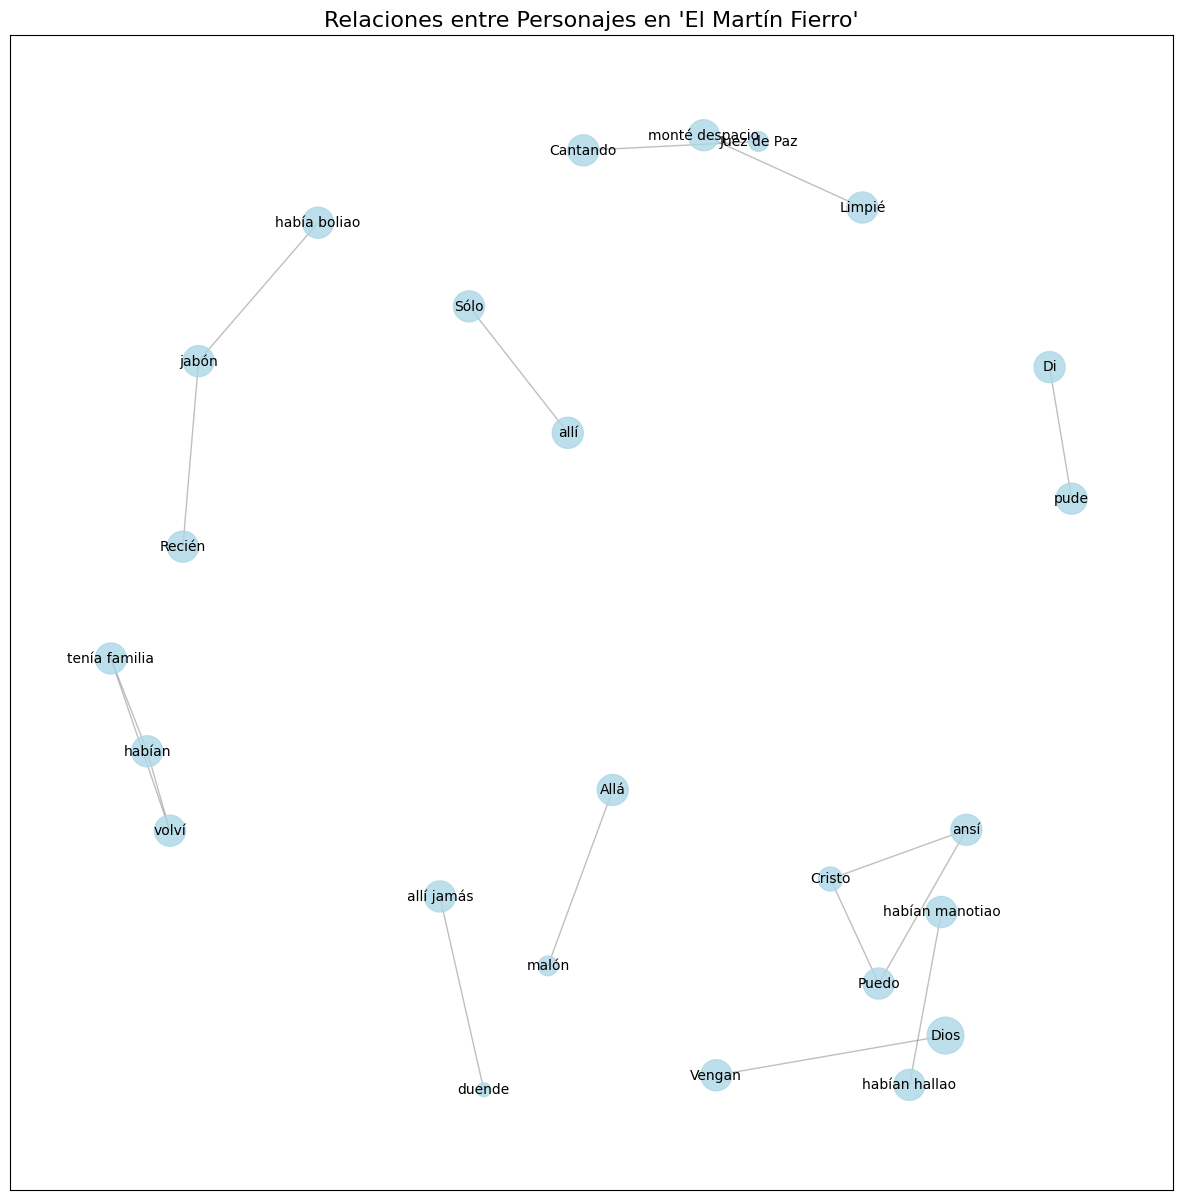

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos el grafico de relaciones
G = nx.Graph()

# Agregamos nodos y aristas con pesos
for (p1, p2), peso in conteo_relaciones.items():
    G.add_edge(p1, p2, weight=peso)

# Tamaños de nodos basados en menciones
node_sizes = [entidades_principales[node] * 100 if node in entidades_principales else 500 for node in G.nodes]


edge_weights = [G[u][v]['weight'] for u, v in G.edges]

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.7)  # Ajustar el diseño del grafo
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Relaciones entre Personajes en 'El Martín Fierro'", fontsize=16)
plt.show()


# Resultados

Realizamos un análisis del texto de "El Martín Fierro" utilizando técnicas de Procesamiento del Lenguaje Natural. Se enfoca principalmente en la identificación de personajes, la frecuencia de sus menciones y las relaciones entre ellos.

Principales hallazgos:

Personajes principales: El análisis identificó correctamente a los personajes principales del poema, como Martín Fierro, Cruz, el Juez de Paz. Estos personajes son mencionados con mayor frecuencia y tienen un rol central en la trama.

Frecuencia de menciones: Se graficó la frecuencia de menciones de los 10 personajes principales, destacando la importancia de Martín Fierro y Cruz en la narrativa.

Relaciones: Se analizó la co-ocurrencia de personajes en las estrofas para identificar las relaciones entre ellos. Se generó un gráfico de red que visualiza estas relaciones.

Personajes secundarios: El código también detectó personajes secundarios como el soldao, la mona, el malón, Cristo, el duende.





# Conclución
El modelo identificó como entidades de tipo PERSONAS algunas frases que no correspondían a personas reales. Por esta razón, fue necesario desarrollar un código para extraer manualmente las entidades que realmente representaban personas para ver cuales eran la principales.
En cuanto a las relaciones, según mi análisis, el modelo tampoco mostró un nivel de precisión satisfactorio.